In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
    
    # Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
    
    # Изменение размерности
x_train = np.expand_dims(x_train, axis=-1)  # (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # (28, 28, 1)

print(f"Форма тренировочных данных: {x_train.shape}")
print(f"Форма тестовых данных: {x_test.shape}")

Форма тренировочных данных: (60000, 28, 28, 1)
Форма тестовых данных: (10000, 28, 28, 1)


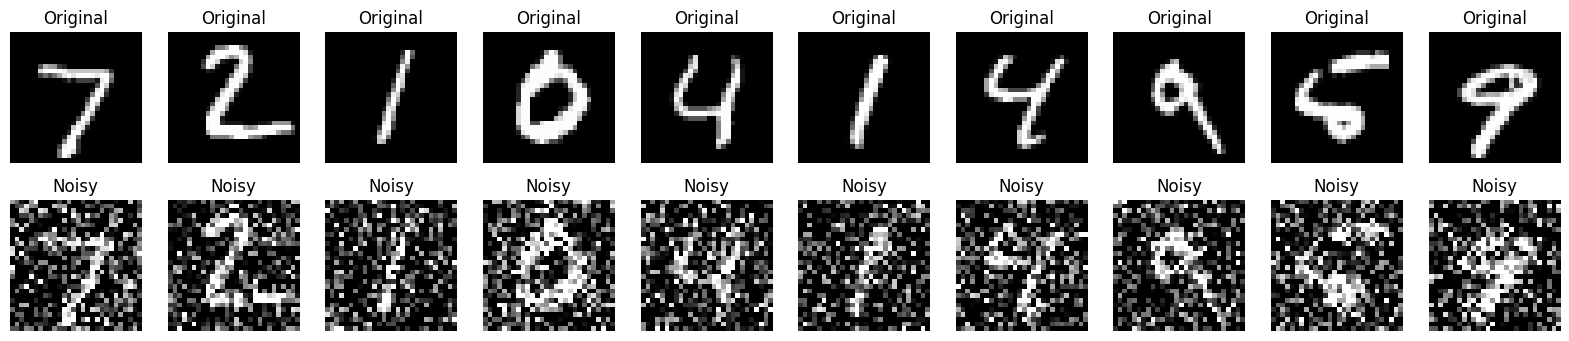

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Добавление шума к изображениям
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Ограничение значений в диапазоне [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Визуализация оригинальных и поврежденных изображений
num_images = 10
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Оригинальное изображение
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Поврежденное изображение
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Dense, Reshape, Input
from tensorflow.keras.models import Model

# Создание энкодера
input_img = Input(shape=(28, 28, 1))
# Применение сверточных слоев
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)

# Запоминание размерности перед Flatten
shape_before_flatten = tf.keras.backend.int_shape(x)[1:]
x = Flatten()(x)
encoded = Dense(64, activation='relu')(x)

# Создание декодера
x = Dense(np.prod(shape_before_flatten), activation='relu')(encoded)
x = Reshape(shape_before_flatten)(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Создание модели автоэнкодера
autoencoder = Model(input_img, decoded)

# Вывод структуры модели
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6272)           │       407,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 994,369 (3.79 MB)

 Trainable params: 994,369 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Компиляция модели
autoencoder.compile(optimizer='adam', loss='mse')

# Обучение автоэнкодера
history = autoencoder.fit(
    x_train_noisy,  # Поврежденные изображения
    x_train,        # Оригинальные изображения
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - loss: 0.0102 - val_loss: 0.0105
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - loss: 0.0099 - val_loss: 0.0104
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.0096 - val_loss: 0.0105
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - loss: 0.0094 - val_loss: 0.0104
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0091 - val_loss: 0.0103
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.0089 - val_loss: 0.0104
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0088 - val_loss: 0.0103
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.0084 - val_loss: 0.0104


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


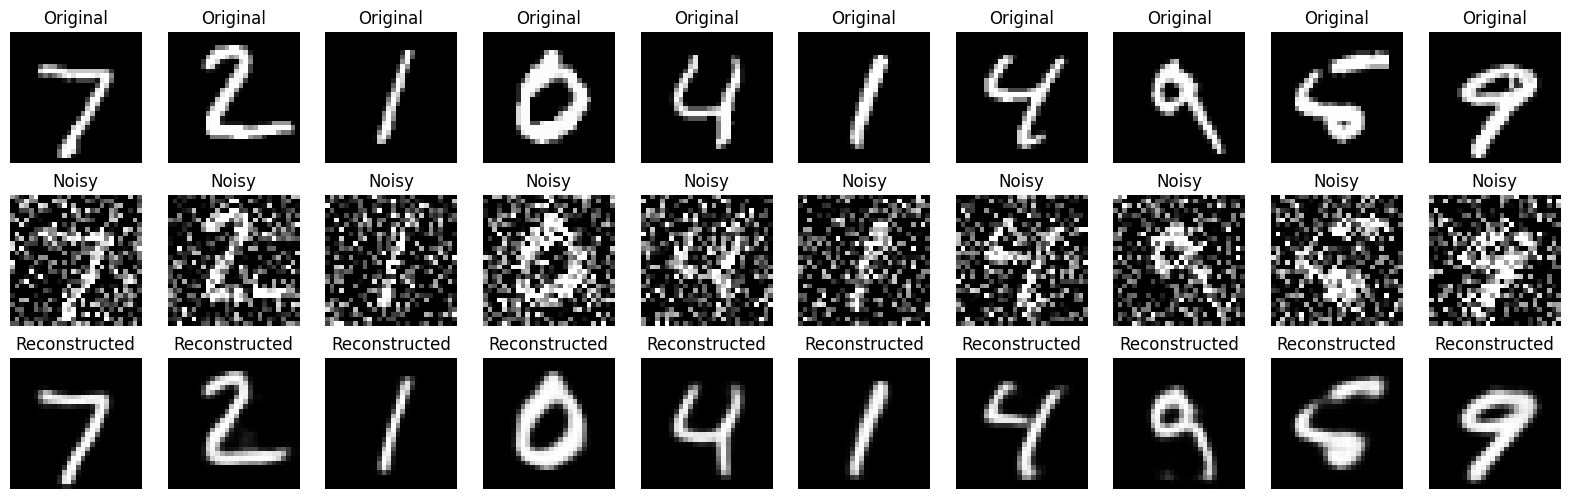

In [13]:
import matplotlib.pyplot as plt

# Восстановление изображений с помощью обученного автоэнкодера
decoded_imgs = autoencoder.predict(x_test_noisy)

# Визуализация оригинальных, поврежденных и восстановленных изображений
num_images = 10
plt.figure(figsize=(20, 6))
for i in range(num_images):
    # Оригинальное изображение
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Поврежденное изображение
    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")
    
    # Восстановленное изображение
    ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
